
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Constraint Satisfaction Problem <br>
<font color=696880 size=4>
Amirabbas Afzali 

____

# Personal Data

In [74]:
# Set your student number
student_number = '401106696'
Name = 'Keyhan'
Last_Name = 'Hodaei'

# Rules
- Make sure that all of your cells can be run perfectly. 

---

# **Graph coloring**

Hello, In this question, we have an engaging problem scenario based on **graph coloring**. Imagine a fictional scenario involving a group of interstellar travelers exploring a mysterious alien planet called **Zyra**. The planet is covered in exotic flora and fauna, and the explorers need to map its regions while adhering to certain rules. Here’s the scenario:


## **The Zyran Flora Expedition**

### **Background:**

The Zyran Flora Expedition, led by renowned botanist Dr. Elara, has landed on the lush and vibrant planet Zyra. Their mission is to catalog the various plant species across the planet’s diverse ecosystems. However, there’s a catch: each plant species emits a unique energy signature that affects the surrounding vegetation. Dr. Elara wants to create a map of Zyra’s regions, ensuring that no two adjacent regions contain the same type of plant.

### **Problem Statement:**
Given the map of Zyra, represented as an undirected graph where each vertex corresponds to a region, design an algorithm to color the regions using as few colors as possible while adhering to the following rules:

1. **Color Constraints:**
- Each region can be assigned one of the available colors.
- No two adjacent regions (sharing a border) can have the same color if they contain the same type of plant.

2. **Objective:**
- Minimize the total number of colors used while ensuring that the map remains scientifically accurate.

3. **Input:**
- A graph representing Zyra’s regions, where vertices represent different ecological zones, and edges connect neighboring zones.

4. **Output:**
- A valid coloring scheme for the regions, using the fewest possible colors.

### **Example:**
Consider a simplified map of Zyra with the following regions and their connections:

**Regions:** A, B, C, D, E, F
**Connections:**
- A and B share a border.
- B and C share a border.
- C and D share a border.
- D and E share a border.
- E and F share a border.

The goal is to color these regions using as few colors as possible. One valid coloring could be:

- A: Green (contains unique plant species X)
- B: Blue (contains unique plant species Y)
- C: Red (contains unique plant species Z)
- D: Green (contains unique plant species X)
- E: Blue (contains unique plant species Y)
- F: Red (contains unique plant species Z)

In this example, only three colors (Green, Blue, and Red) are needed to represent Zyra’s diverse flora.


## Input
  - The first line determines $N$ (count of regions).
  - The third line determines $M$ (count of possible colors for each region).
  - in each of the following lines, a pair of region numbers (adjacent constraints) is given.

$$1 \le N \le 60$$
$$1 \le M \le 5$$

### Sample Input
This sample describes the previous example.

```
N = 6
# Colors
colors = 3
# Graph: 
0,1
1,2
2,3
3,4
4,5
```

### Imports

Feel free to import any library you need.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy

np.random.seed(1234)

In [76]:
# Global Variable variables
neighbours = {}
start_variables = {}

Necessary Functions and classes :

In [77]:
##############################################
# no need to do any thing,
# However, you can change it if needed
##############################################

# Function to read data from the input file
def fileReader(textfile):
    neighbours.clear()
    start_variables.clear()
    with open(textfile, "r") as f:
        data = f.readlines()
    # Process each line of data
        for line in data:
            if line.startswith('#') or line.strip() == "":
                continue
            elif line.startswith('c'):
                colors = int(''.join(filter(str.isdigit, line)))
                continue
            # Split the line into two nodes
            node1, node2 = map(int, line.strip().split(","))
            # Update the neighbours
            if node1 not in neighbours:
                neighbours[node1] = []
            neighbours[node1].append(node2)
            if node2 not in neighbours:
                neighbours[node2] = []
            neighbours[node2].append(node1)
            # Update the variables
            if node1 not in start_variables:
                start_variables[node1] = [None, list(range(1, colors+1))]
            if node2 not in start_variables:
                start_variables[node2] = [None, list(range(1, colors+1))]


# Class definition of a state
class color:
    
    # Constructor to intialize the fields of the current state
    def __init__(self, assigned, variables):
        self.assigned = assigned   # Stores the variables that already have been assigned
        self.variables = variables # Stores the current state of the graph
        self.curr = None           # Stores the current variable chosen to assign from the MRV Heuristic
    
    # Function to print the variables with their values
    def printvar(self):
        for var in self.variables:
            print(f"Region ID : {var} - Region Color: {self.variables[var][0]}")

            
    # Function to visualise the final coloured graph
    def colorGraph(self ,report=True):
        G = nx.Graph()
        for node, neighbours_list in neighbours.items():
            G.add_node(node)
            for neighbour in neighbours_list:
                G.add_edge(node, neighbour)
        # Draw the graph
        pos = nx.spring_layout(G)
        # Define a color map
        colors_map = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'pink', 6: ' brown'}
        # Loop over the nodes and their assigned colors
        for node, (color, _) in self.variables.items():
            if color is not None:
                nx.set_node_attributes(G, {node: colors_map[color]}, 'color')
        # Draw the graph with node colors
        node_colors = nx.get_node_attributes(G, 'color')
        nx.draw(G, pos, with_labels=True, node_color=list(node_colors.values()))
        if  report:
            plt.show()

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You _must_ implement and use the heuristic algorithms **MRV** and **LCV** in order to pass all tests in an appropriate time.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells)

In [78]:
# Function to ensure arc consistency
def arc_consistency(variables: dict):
    new_variables = copy.deepcopy(variables)
    arcs = [(node, neighbour) for node in neighbours for neighbour in neighbours[node]]
    while len(arcs) > 0:
        arc = arcs.pop(0)
        if remove_inconsistent_values(arc, new_variables):
            for neighbour in neighbours[arc[0]]:
                arcs.append((neighbour, arc[0]))
    return new_variables
    

# Function to remove the inconsistent values in an arc.
def remove_inconsistent_values(arc: tuple, variables: dict):
    removed = False
    values_to_remove = []
    for x in variables[arc[0]][1]:
        counter = 0
        for y in variables[arc[1]][1]:
            if x == y:
                counter += 1
        if counter == len(variables[arc[1]][1]):
            values_to_remove.append(x)
    for x in values_to_remove:
        variables[arc[0]][1].remove(x)
    if len(values_to_remove) > 0: removed = True
    return removed


# Function to find the minimum remaining variable to be assigned
def minimum_remaining_variable(state: color):
    #################################################################
    # (Point: 15% of total score)                                   #
    #################################################################
    sorted_values = []
    variables = state.variables
    for var in variables:
        if variables[var][0] is None:
            sorted_values.append((var, len(variables[var][1])))
    
    y = sorted(sorted_values, key=lambda x: (x[1], -find_degree(state, x[0])))
    # print(y)
    return y[0][0]


def find_degree(state: color, node: int):
    counter = 0
    for neighbour in neighbours[node]:
        if neighbour not in state.assigned:
            counter += 1
    return counter


# Function to find the least constraining value
def least_constraining_value(state: color):
    sorted_values = []
    variables = state.variables
    node = state.curr
    for color in variables[node][1]:
        counter = 0
        for neighbour in neighbours[node]:
            if variables[neighbour][0] is None:
                for _color in variables[neighbour][1]:
                    if _color == color:
                        counter += 1
        sorted_values.append((color, counter))
    return sorted(sorted_values, key=lambda x: x[1])


# Function to call the backtracking search
def backtrack(filename: str, report=True):
    fileReader(filename)
    #################################################################
    # (Point: 35% of total score)                                   #
    # This function returns a solution if there is a complete       #
    # assignment or failure if there is not                         #
    #################################################################
    state = color({}, start_variables)
    state = backtrack_search(state)
    if state is not None:
        state.printvar()
        state.colorGraph(report)
    else:
        print("No solution found")
    return


def check(state: color):
    for x in state.assigned:
        for y in state.assigned:
            if x in neighbours[y]:
                if state.variables[x][0] == state.variables[y][0]:
                    return False
    return True


# Recursive function that performs backtracking search based on the heuristics
def backtrack_search(state: color):
    #################################################################
    # (Point: 5% of total score)                                    #
    #  Just for start of your backtrack                             #
    #################################################################
    if len(state.assigned) == len(neighbours):
        for _var in state.variables:
            if _var not in state.assigned and len(state.variables[_var][1]) == 0:
                return None
        if check(state):
            return state
        return None
    var = minimum_remaining_variable(state)
    state.curr = minimum_remaining_variable(state)
    for _tuple in least_constraining_value(state):
        value = _tuple[0]
        new_state = copy.deepcopy(state)
        new_state.variables[var] = (value, [value])
        new_state.assigned[var] = value
        state.variables = arc_consistency(state.variables)
        for _var in state.variables:
            if _var not in state.assigned and len(state.variables[_var][1]) == 0:
                return None
        if not check(state):
            return None
        new_state = backtrack_search(new_state)
        if new_state is not None:
            return new_state
    return None


## Validate:

In order to validate your implementation , run below blocks.
 
**Note that** correct implementation of different functions (LCV, MVR, ...) and final results are needed to get full score.


Test 1: 
Region ID : 1 - Region Color: 1
Region ID : 2 - Region Color: 2
Region ID : 3 - Region Color: 1
Region ID : 4 - Region Color: 2


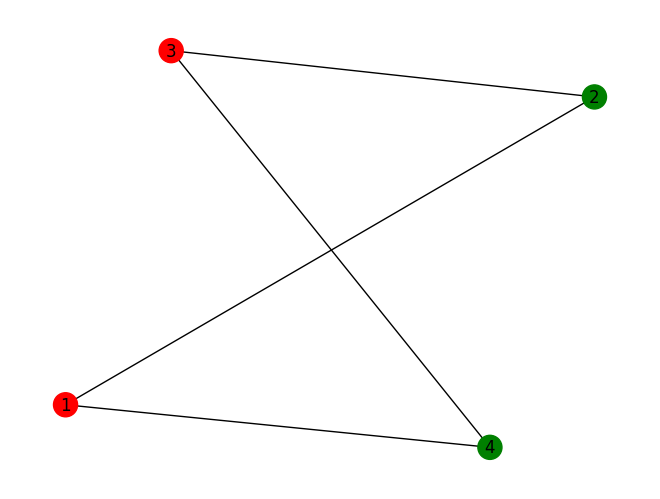

Test 2: 
Region ID : 1 - Region Color: 3
Region ID : 2 - Region Color: 1
Region ID : 3 - Region Color: 2
Region ID : 4 - Region Color: 2
Region ID : 5 - Region Color: 1
Region ID : 6 - Region Color: 3
Region ID : 7 - Region Color: 4


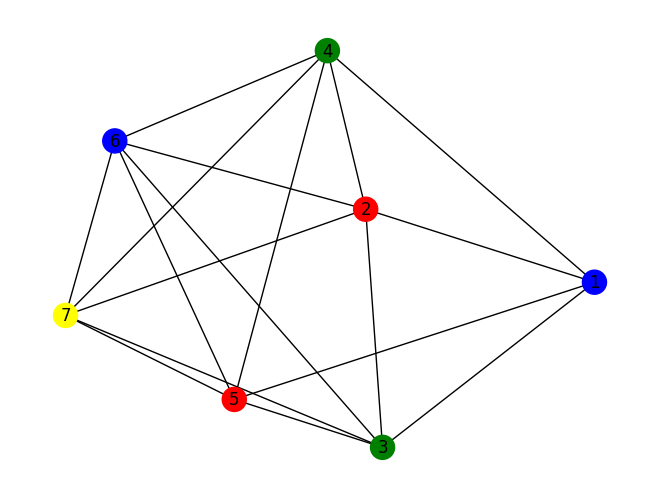

Test 3: 
Region ID : 0 - Region Color: 1
Region ID : 1 - Region Color: 2
Region ID : 2 - Region Color: 2
Region ID : 3 - Region Color: 2
Region ID : 4 - Region Color: 1
Region ID : 5 - Region Color: 3
Region ID : 6 - Region Color: 2
Region ID : 7 - Region Color: 3
Region ID : 8 - Region Color: 1
Region ID : 9 - Region Color: 1
Region ID : 10 - Region Color: 1
Region ID : 11 - Region Color: 2
Region ID : 12 - Region Color: 3
Region ID : 13 - Region Color: 2
Region ID : 14 - Region Color: 1
Region ID : 15 - Region Color: 3
Region ID : 16 - Region Color: 2
Region ID : 17 - Region Color: 1
Region ID : 18 - Region Color: 1
Region ID : 19 - Region Color: 1
Region ID : 20 - Region Color: 3
Region ID : 21 - Region Color: 1
Region ID : 22 - Region Color: 2
Region ID : 23 - Region Color: 2
Region ID : 24 - Region Color: 1
Region ID : 25 - Region Color: 3
Region ID : 26 - Region Color: 3
Region ID : 27 - Region Color: 3
Region ID : 28 - Region Color: 1
Region ID : 29 - Region Color: 2
Region ID :

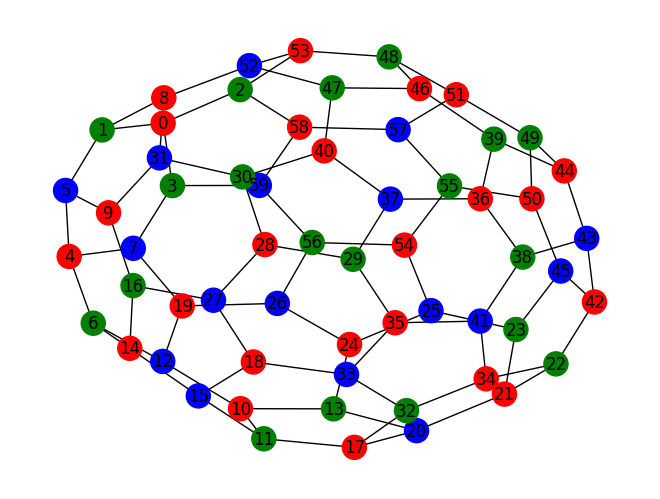

Test 4: 
Region ID : 0 - Region Color: 2
Region ID : 1 - Region Color: 3
Region ID : 2 - Region Color: 4
Region ID : 3 - Region Color: 1
Region ID : 4 - Region Color: 4
Region ID : 5 - Region Color: 1
Region ID : 6 - Region Color: 4
Region ID : 7 - Region Color: 2
Region ID : 8 - Region Color: 1
Region ID : 9 - Region Color: 1
Region ID : 10 - Region Color: 2
Region ID : 11 - Region Color: 3
Region ID : 12 - Region Color: 4
Region ID : 13 - Region Color: 2
Region ID : 14 - Region Color: 3
Region ID : 15 - Region Color: 4
Region ID : 16 - Region Color: 2
Region ID : 17 - Region Color: 3
Region ID : 18 - Region Color: 4
Region ID : 19 - Region Color: 1
Region ID : 20 - Region Color: 3
Region ID : 21 - Region Color: 4
Region ID : 22 - Region Color: 2


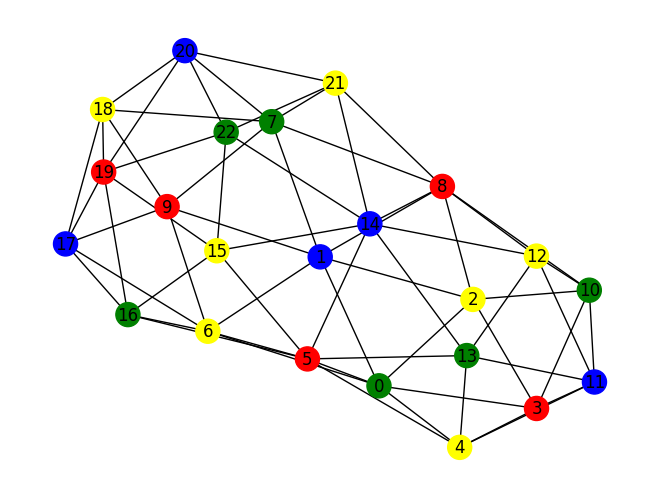

Test 5: 
Region ID : 0 - Region Color: 1
Region ID : 1 - Region Color: 2
Region ID : 2 - Region Color: 2
Region ID : 3 - Region Color: 2
Region ID : 4 - Region Color: 1
Region ID : 5 - Region Color: 3
Region ID : 6 - Region Color: 2
Region ID : 7 - Region Color: 3
Region ID : 8 - Region Color: 1
Region ID : 9 - Region Color: 1
Region ID : 10 - Region Color: 1
Region ID : 11 - Region Color: 2
Region ID : 12 - Region Color: 3
Region ID : 13 - Region Color: 2
Region ID : 14 - Region Color: 1
Region ID : 15 - Region Color: 3
Region ID : 16 - Region Color: 2
Region ID : 17 - Region Color: 1
Region ID : 18 - Region Color: 1
Region ID : 19 - Region Color: 1
Region ID : 20 - Region Color: 3
Region ID : 21 - Region Color: 1
Region ID : 22 - Region Color: 2
Region ID : 23 - Region Color: 2
Region ID : 24 - Region Color: 1
Region ID : 25 - Region Color: 3
Region ID : 26 - Region Color: 3
Region ID : 27 - Region Color: 3
Region ID : 28 - Region Color: 1
Region ID : 29 - Region Color: 2
Region ID :

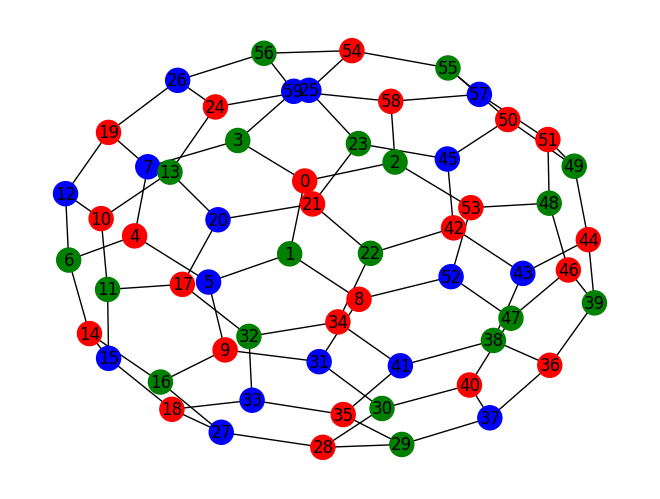

Test 6: 
Region ID : 0 - Region Color: 1
Region ID : 1 - Region Color: 3
Region ID : 2 - Region Color: 2
Region ID : 3 - Region Color: 4
Region ID : 4 - Region Color: 4
Region ID : 5 - Region Color: 3
Region ID : 6 - Region Color: 1
Region ID : 7 - Region Color: 2
Region ID : 8 - Region Color: 3
Region ID : 9 - Region Color: 2
Region ID : 10 - Region Color: 4
Region ID : 11 - Region Color: 1
Region ID : 12 - Region Color: 4
Region ID : 13 - Region Color: 2
Region ID : 14 - Region Color: 3
Region ID : 15 - Region Color: 1
Region ID : 16 - Region Color: 3


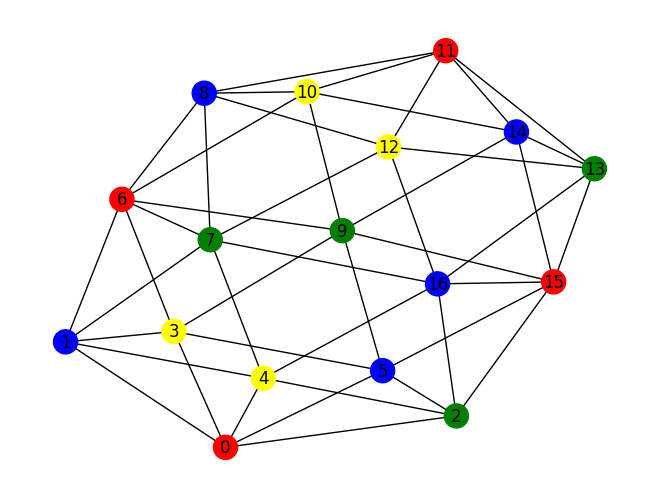

Test 7: 
Region ID : 0 - Region Color: 3
Region ID : 1 - Region Color: 4
Region ID : 2 - Region Color: 1
Region ID : 3 - Region Color: 2
Region ID : 4 - Region Color: 4
Region ID : 5 - Region Color: 1
Region ID : 6 - Region Color: 2
Region ID : 7 - Region Color: 4
Region ID : 8 - Region Color: 3
Region ID : 9 - Region Color: 4
Region ID : 10 - Region Color: 2
Region ID : 11 - Region Color: 3
Region ID : 12 - Region Color: 1
Region ID : 13 - Region Color: 3
Region ID : 14 - Region Color: 4


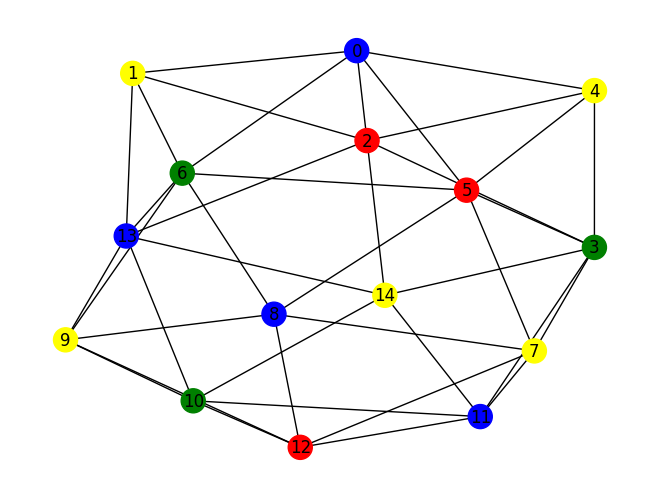

Test 8: 
No solution found
Test 9: 
Region ID : 0 - Region Color: 1
Region ID : 1 - Region Color: 2
Region ID : 2 - Region Color: 3
Region ID : 3 - Region Color: 4
Region ID : 4 - Region Color: 5


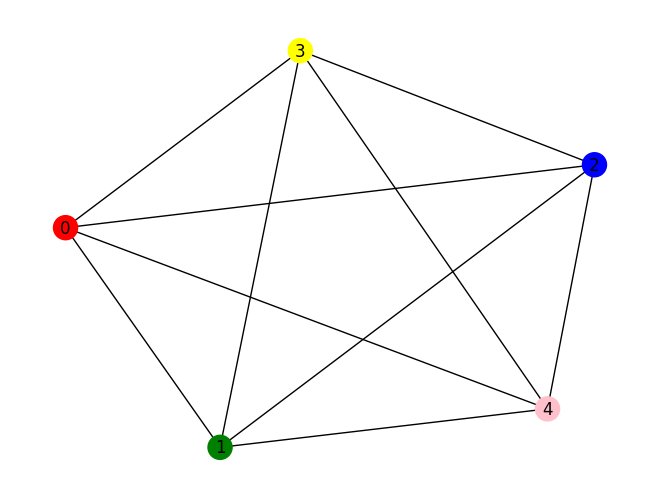

In [79]:
num_tests = 9
for i in range(num_tests):
    print(f'Test {i+1}: ')
    backtrack(f'data/input{i}.txt')
    print('='*90)

### Plot results of first 6 test-cases :

Region ID : 1 - Region Color: 1
Region ID : 2 - Region Color: 2
Region ID : 3 - Region Color: 1
Region ID : 4 - Region Color: 2
Region ID : 1 - Region Color: 3
Region ID : 2 - Region Color: 1
Region ID : 3 - Region Color: 2
Region ID : 4 - Region Color: 2
Region ID : 5 - Region Color: 1
Region ID : 6 - Region Color: 3
Region ID : 7 - Region Color: 4
Region ID : 0 - Region Color: 1
Region ID : 1 - Region Color: 2
Region ID : 2 - Region Color: 2
Region ID : 3 - Region Color: 2
Region ID : 4 - Region Color: 1
Region ID : 5 - Region Color: 3
Region ID : 6 - Region Color: 2
Region ID : 7 - Region Color: 3
Region ID : 8 - Region Color: 1
Region ID : 9 - Region Color: 1
Region ID : 10 - Region Color: 1
Region ID : 11 - Region Color: 2
Region ID : 12 - Region Color: 3
Region ID : 13 - Region Color: 2
Region ID : 14 - Region Color: 1
Region ID : 15 - Region Color: 3
Region ID : 16 - Region Color: 2
Region ID : 17 - Region Color: 1
Region ID : 18 - Region Color: 1
Region ID : 19 - Region Color: 

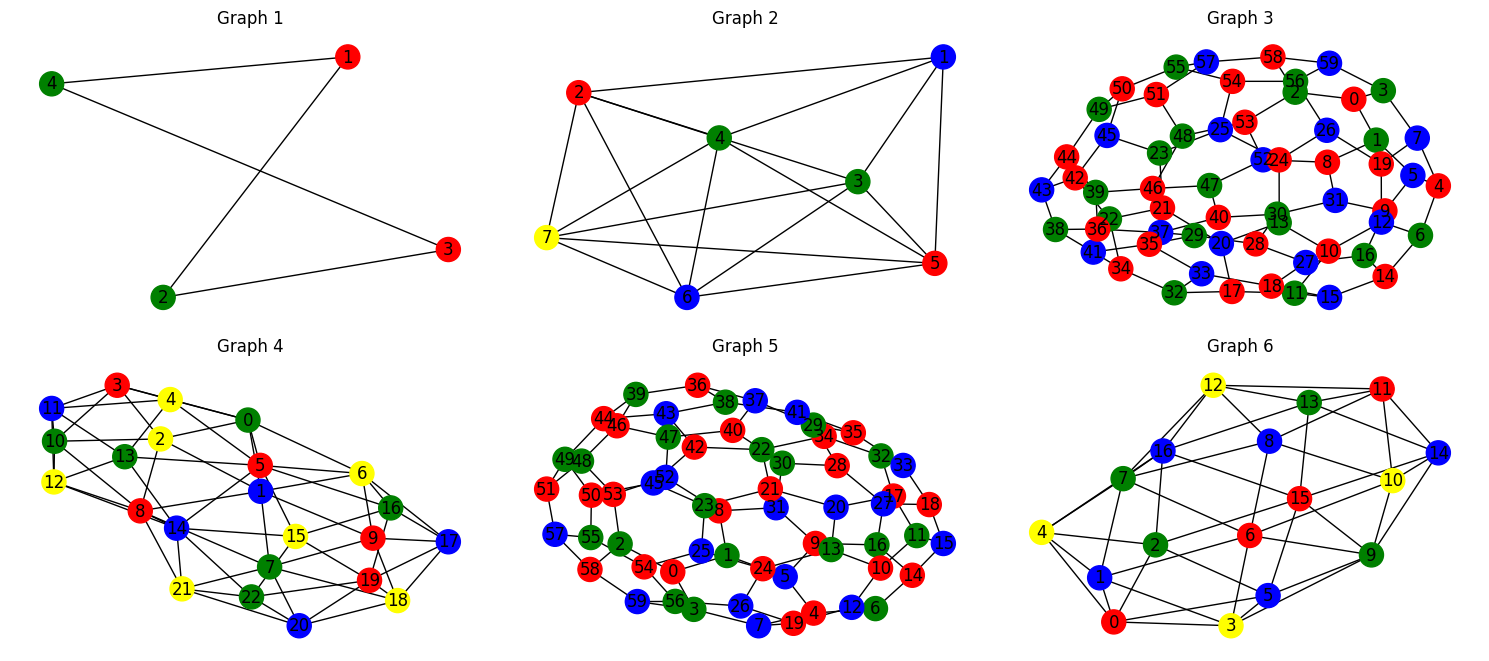

In [80]:
plt.figure(figsize=(15, 10))
idx = [331+i for i in range(6)]

for i in range(6):
    plt.subplot(idx[i])
    backtrack(f'data/input{i}.txt',report=False)
    plt.title(f'Graph {i+1}')

plt.tight_layout()
plt.show()

# **Best regards :)**